In [5]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import gensim
from nltk.data import find
import string
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
%matplotlib inline

In [6]:
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to
[nltk_data]     C:\Users\wangs\AppData\Roaming\nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


True

In [9]:
with open('KJV.txt', 'r',encoding='UTF-8') as file:
    mydata = file.read()

In [47]:
# Sentence tokenisation
mydata_tokens = nltk.sent_tokenize(mydata[2850:])

# Remove punctuation
mydata_tokens_no_punct = [''.join(letter for letter in word if letter not in string.punctuation and letter not in string.digits) for word in mydata_tokens]

# Separate sentences
separate_sentences = list((mysent.split() for mysent in mydata_tokens_no_punct))


In [49]:
print(len(separate_sentences))

29926


In [50]:
token_len = []
for token in mydata_tokens_no_punct :
    token_len.append(len(token))
print("token_len:", token_len[:20])

token_len: [53, 83, 55, 52, 83, 62, 50, 110, 142, 36, 51, 123, 119, 170, 169, 51, 264, 126, 193, 52]


In [172]:
mydata_tokens_no_punct[7]

' And God said Let there be a firmament in the midst of the waters\nand let it divide the waters from the waters'

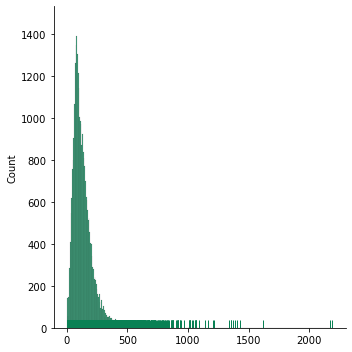

In [61]:
import seaborn
seaborn.displot(token_len,kde= False, rug= True,
               color="#098154")

In [81]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wangs\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [184]:
mydata_tokens_no_punct[0]

'In the beginning God created the heaven and the earth'

In [186]:
analyzer.polarity_scores(mydata_tokens_no_punct[0])['compound']

0.7506

In [199]:
text="But if he thrust him of hatred, or hurl at him by laying of wait, that he die;"
analyzer.polarity_scores(text)['compound']

-0.9209

In [107]:
score =[]
pos = []
analyzer = SentimentIntensityAnalyzer()
for sent in mydata_tokens_no_punct:
      score.append(analyzer.polarity_scores(sent)['compound'])
      pos.append(analyzer.polarity_scores(sent)['pos'])

In [193]:
print(min(score))
maxpos = score.index(min(score))
mydata_tokens_no_punct[maxpos]

-0.9888


' But if he thrust him of hatred or hurl at him by laying of\nwait that he die  Or in enmity smite him with his hand that he\ndie he that smote him shall surely be put to death for he is a\nmurderer the revenger of blood shall slay the murderer when he\nmeeteth him'

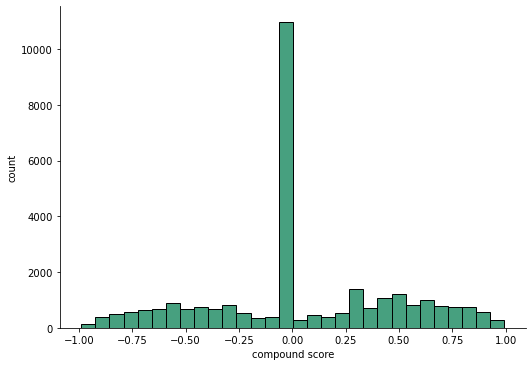

In [121]:

ax1=seaborn.displot(score,kde= False, rug=False,aspect=1.5,
               color="#098154",bins=30)
ax1.set_axis_labels("compound score", "count")
ax1.set_titles("sentiment intensity for each sentence in KJV")
fig.legend(labels=["AAA"])



In [128]:
mydata_tokens_no_punct[0]
print(separate_sentences[0])

['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth']


In [129]:
# 中间层 默认100
#window (int, optional) – Maximum distance between the current and predicted word
#min_count (int, optional) – Ignores all words with total frequency lower than this.
#vector_size (int, optional) – Dimensionality of the word vectors.  100

min_count (int, optional) – Ignores all words with total frequency lower than this.
model = gensim.models.Word2Vec(
    separate_sentences,
    min_count=3,  
    sg = 1,       
    window=7      
)       

model.save("word2vec.model")

C:\Users\wangs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Saviour'),
  Text(1, 0, 'redeemer'),
  Text(2, 0, 'excellency'),
  Text(3, 0, 'Father'),
  Text(4, 0, 'holiness'),
  Text(5, 0, 'magnified'),
  Text(6, 0, 'gracious'),
  Text(7, 0, 'heavenly'),
  Text(8, 0, 'Bless'),
  Text(9, 0, 'glorify')])

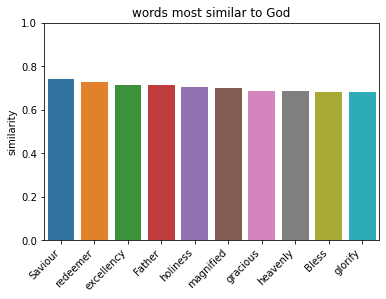

In [142]:
list_god = model.wv.most_similar('God')
x_val = [x[0] for x in list_god ]
y_val = [x[1] for x in list_god ]
seaborn.barplot(x_val,y_val)
plt.ylim([0,1])
plt.title("words most similar to God")
plt.ylabel("similarity")
plt.xticks(rotation=45, ha='right')

C:\Users\wangs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Christ'),
  Text(1, 0, 'John'),
  Text(2, 0, 'Nazareth'),
  Text(3, 0, 'Lord'),
  Text(4, 0, 'Paul'),
  Text(5, 0, 'baptism'),
  Text(6, 0, 'Esaias'),
  Text(7, 0, 'gospel'),
  Text(8, 0, 'Peter'),
  Text(9, 0, 'resurrection')])

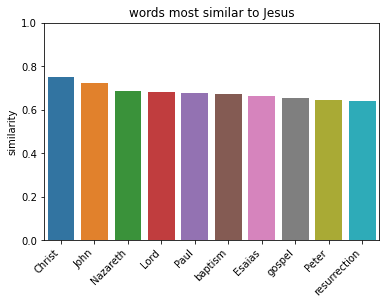

In [148]:
list_god2 = model.wv.most_similar('Jesus')
x_val = [x[0] for x in list_god2 ]
y_val = [x[1] for x in list_god2 ]
seaborn.barplot(x_val,y_val)
plt.ylim([0,1])
plt.title("words most similar to Jesus")
plt.ylabel("similarity")
plt.xticks(rotation=45, ha='right')

In [157]:
#total number of keys (words)
print(len(model.wv.key_to_index))
len(model.wv.get_vector("and"))

7517


100

In [167]:
#save the model for visualization
model.wv.save_word2vec_format("model-bible")
# python -m gensim.scripts.word2vec2tensor -i "model-bible" -o "vis.tsv"

In [155]:
emb_df = (
    pd.DataFrame(
        [model.wv.get_vector(str(n)) for n in model.wv.key_to_index],
        index = model.wv.key_to_index
    )
)
print(emb_df.shape)
emb_df.head()

(7517, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
the,-0.309155,0.096468,-0.018805,0.011734,-0.105480,-0.324874,0.106005,0.284246,-0.224674,-0.073091,...,0.218618,0.083706,0.029178,-0.025573,0.360864,-0.064455,-0.155625,-0.056670,-0.140325,0.126848
and,-0.086922,-0.108565,0.021022,0.358653,0.135519,-0.199557,-0.057790,0.125324,-0.154618,-0.198924,...,-0.265803,-0.002721,0.120559,-0.235726,0.392809,0.172294,0.000871,-0.202322,0.288671,0.182637
of,-0.236709,0.010503,-0.000077,0.065543,-0.194204,-0.033900,0.164305,0.158873,-0.311080,-0.041881,...,0.020442,0.175185,0.193902,-0.427396,0.328254,0.081994,-0.017059,-0.435176,0.129639,0.147547
to,-0.416115,-0.113385,0.344330,0.379241,0.169008,-0.116850,0.066831,0.226120,-0.018680,-0.185404,...,0.044700,0.285635,0.112024,0.170323,0.858911,-0.208007,0.046810,-0.018324,-0.030604,0.203368
And,-0.262893,0.285384,0.364286,0.350863,0.105281,-0.089379,0.056293,0.111550,0.268709,0.277015,...,0.434780,-0.284028,0.228997,-0.270701,0.539170,-0.351453,0.173049,0.073293,0.325971,0.422446


In [159]:
#use pca to visualize words

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=7)


In [160]:
pca_model = pca.fit_transform(emb_df)

In [161]:
emb_df_PCA = (
    pd.DataFrame(
        pca_model,
        columns=['x','y'],
        index = emb_df.index
    )
)


In [75]:
from nltk import word_tokenize
from nltk.lm import MLE
from nltk.lm.preprocessing import pad_both_ends, padded_everygram_pipeline

s = "Natural-language processing (NLP) is an area of computer science " \
    "and artificial intelligence concerned with the interactions " \
    "between computers and human (natural) languages."
s = s.lower()

paddedLine = [list(pad_both_ends(word_tokenize(s), n=2))]

train, vocab = padded_everygram_pipeline(2, paddedLine)

lm = MLE(2)

lm.fit(train, vocab)

print(lm.counts)
train

<NgramCounter with 2 ngram orders and 61 ngrams>


<generator object padded_everygram_pipeline.<locals>.<genexpr> at 0x0000022BEFD1D2E0>

In [166]:
python -m gensim.scripts.word2vec2tensor -i ~/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz                                              -o /tmp/my_model_prefix

[]

<Figure size 432x288 with 0 Axes>

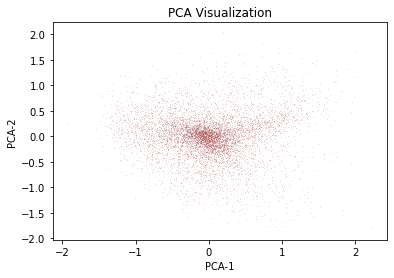

In [163]:

plt.clf()
fig = plt.figure(figsize=(6,4))

seaborn.scatterplot(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()